# Week 13

## Supervised Learning Continued:
    1. Decision tree
    2. Random forest

Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import datasets
from sklearn import metrics 
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Loading data

In [2]:
col_names = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']

In [3]:
diabetes = pd.read_csv('diabetes.csv', header=0, names = col_names)
#not gonna import header, instead naming the header from the col_names; 
#if not removing it, the header will be considered as a data

In [4]:
diabetes

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
corr = diabetes.corr() #calculating correlation between attributes

In [7]:
corr

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
label,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


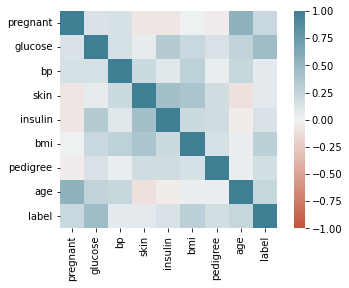

In [8]:
ax = sns.heatmap(corr,vmin=-1,vmax=1,center=0,square=True,cmap=sns.diverging_palette(20,220,n=200))
#v is set range; cmap is for color palette (color_palette('name') or divergoing_palette(HUSL color range, n is to be not blurry))

Features and targets

In [9]:
feature_cols = ['pregnant','glucose','bp','skin','insulin', 'bmi', 'pedigree', 'age']

X = diabetes[feature_cols]
y = diabetes.label

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [11]:
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (537, 8)
X_test: (231, 8)
y_train: (537,)
y_test: (231,)


In [12]:
clf = DecisionTreeClassifier(criterion='gini')
#default is gini alrd, Gini impurity is a function taht determines how well a decision tree was split
clf = clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

Model evaluation

In [13]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7359307359307359


## Visualization

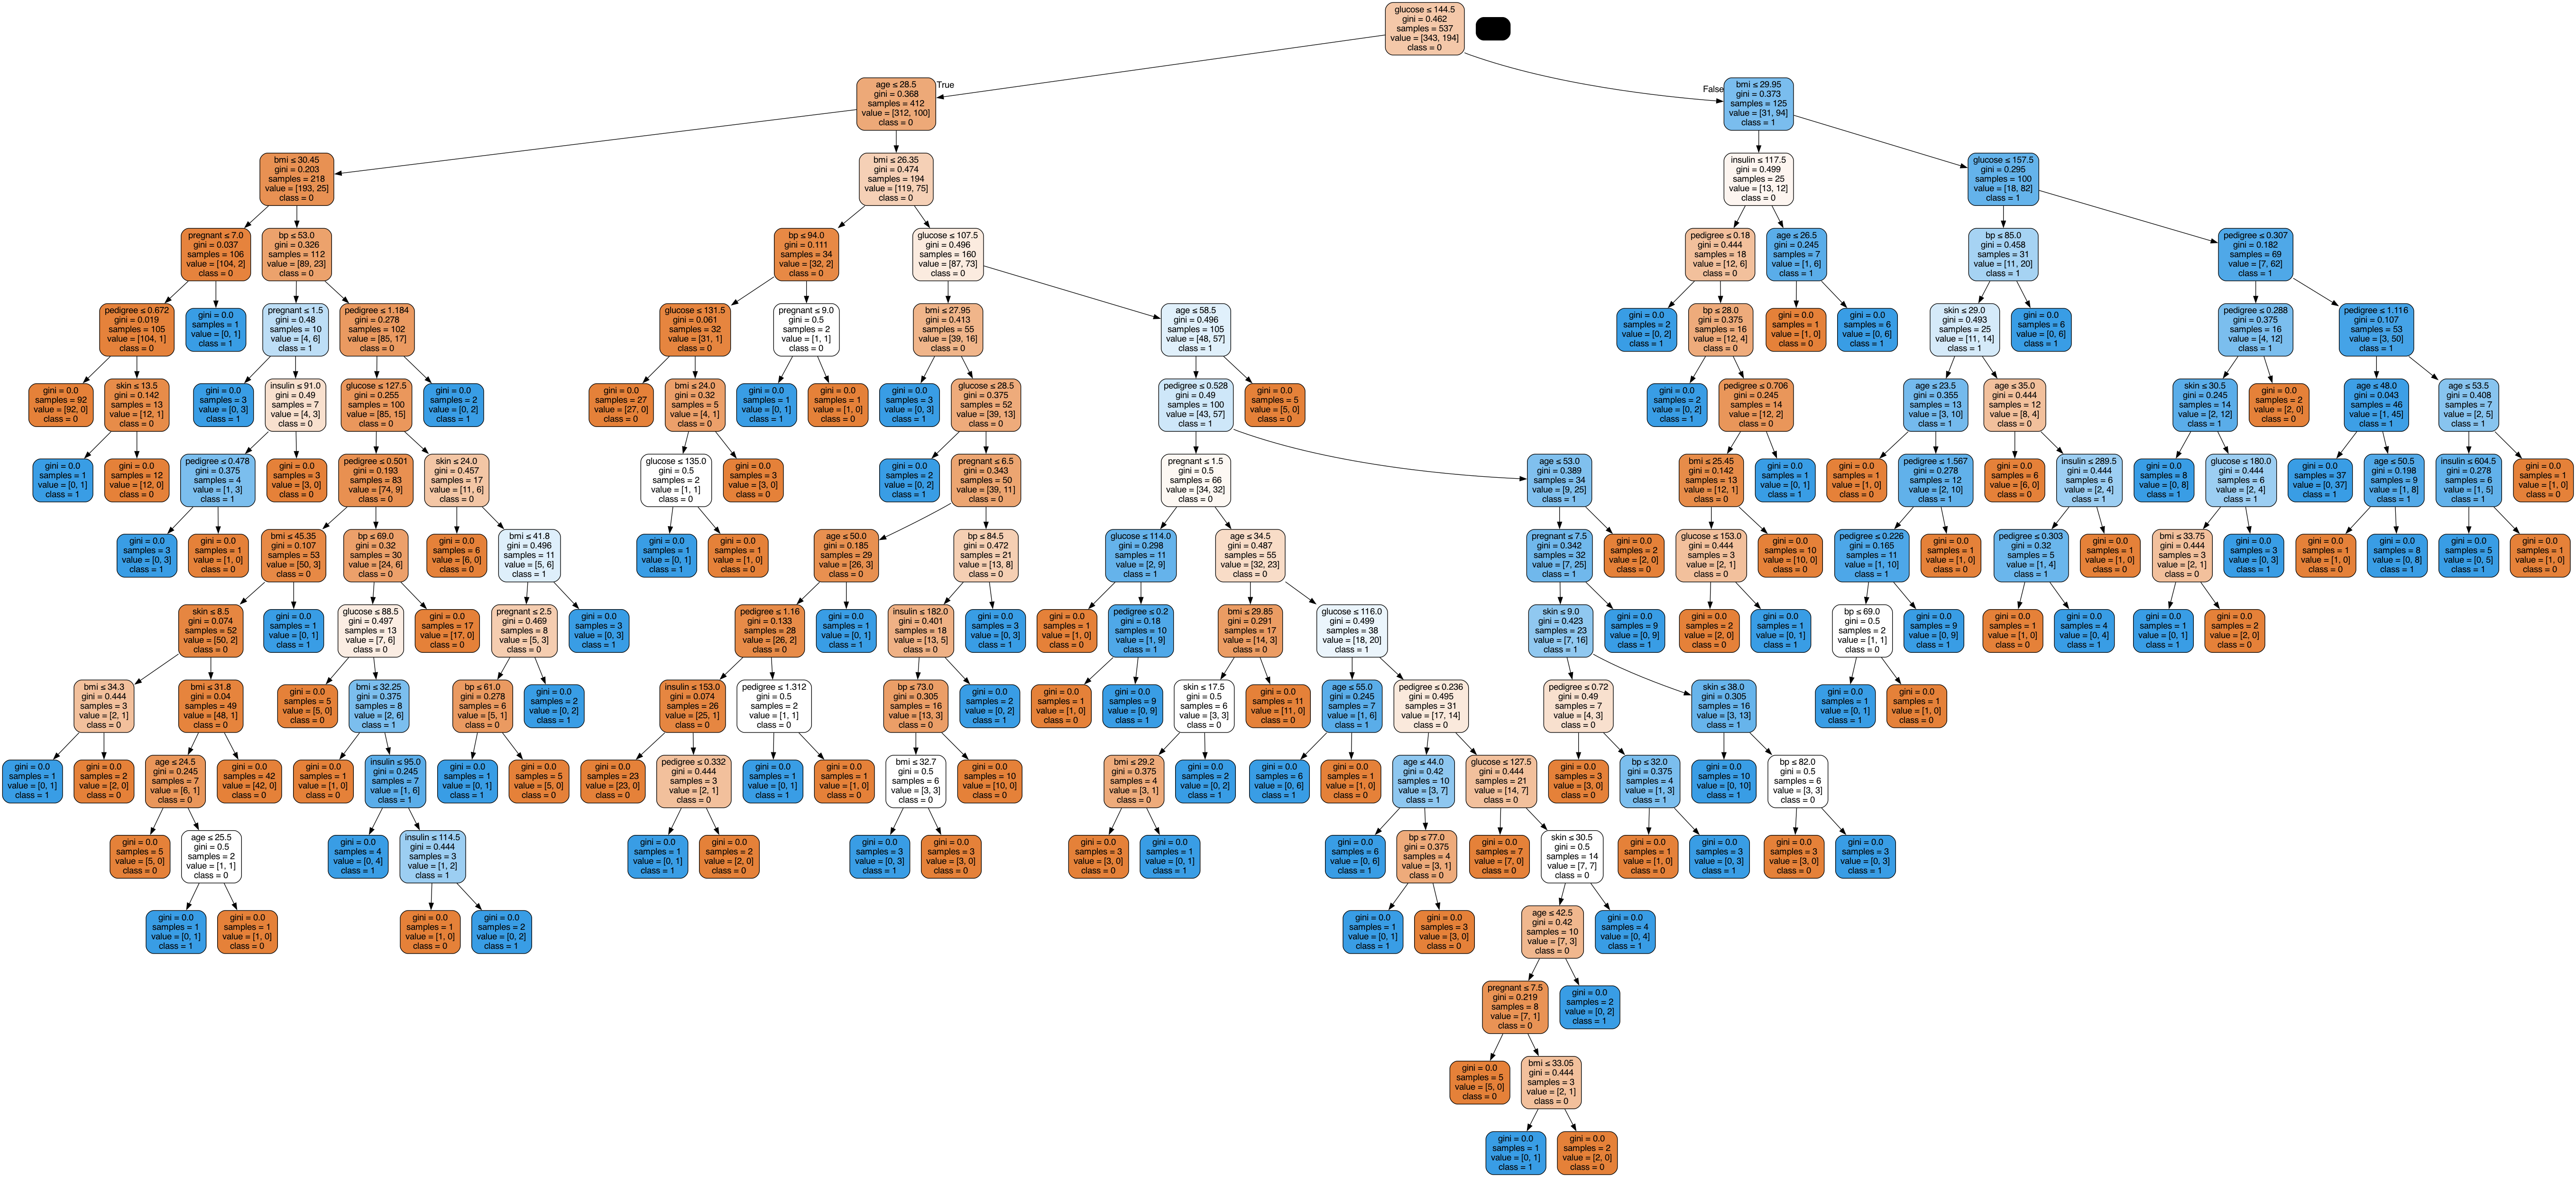

In [14]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,
                class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

graph.write_png('diabetes.png') 
Image(graph.create_png())

#If there is error, reinstall graphviz using other method
#or run:(import os; os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphiz")


In [17]:
import os; os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphiz"

'/opt/homebrew/bin:/opt/homebrew/sbin:/Users/daffa/opt/anaconda3/bin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/usr/local/mysql-8.0.29-macos12-arm64/bin;/Users/daffa/opt/anaconda3\\Library\\bin\\graphiz'

Another example

In [18]:
from sklearn import datasets

In [19]:
iris = datasets.load_iris()

In [20]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [21]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


use pandas and make it into dataframe 


In [22]:
data = pd.DataFrame({'sepal length':iris.data[:,0],'sepal width':iris.data[:,1],'petal length':iris.data[:,2],'petal width':iris.data[:,3],'species':iris.target})

data

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [23]:
X = iris.data
y = iris.target

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [25]:
iris_model = clf.fit(X_train, y_train)

In [26]:
prediction = clf.predict([[10,5,1,3]])#([['sepal length', 'sepal width', 'petal length', 'petal width']])
print(prediction)

[0]


In [27]:
clf.score(X_test, y_test)

0.9777777777777777

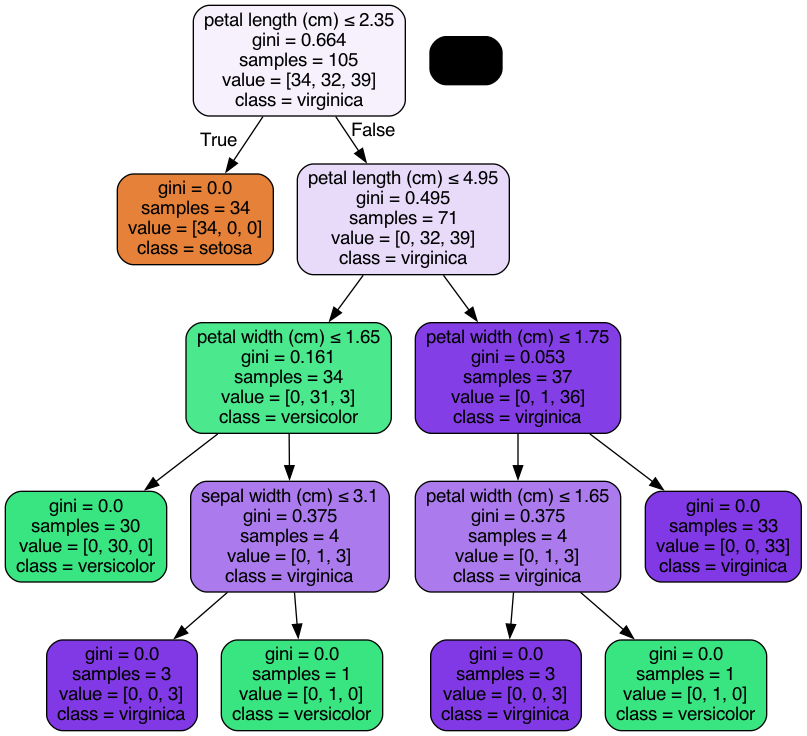

In [28]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = iris.feature_names,
                class_names=iris.target_names)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

graph.write_png('iris.png') 
Image(graph.create_png())

In [29]:
#other way
from dtreeviz.trees import dtreeviz

In [30]:
viz = dtreeviz(clf, iris['data'], iris['target'], target_name = 'species', feature_names = np.array(iris['feature_names']), class_names = {0: 'setosa', 1: 'versicolor', 2: 'virginica'})

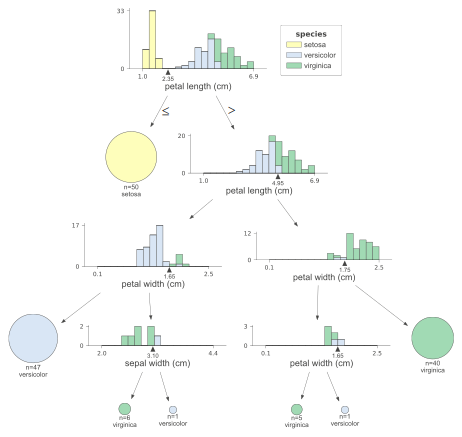

In [31]:
viz

## Random Forest

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100)#max is 130 for n trees

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [34]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


Feature importance

In [35]:
feature_imp = pd.Series(rf.feature_importances_, index = iris.feature_names).sort_values(ascending = False)
feature_imp #see the importance of a feature

petal width (cm)     0.459512
petal length (cm)    0.393336
sepal length (cm)    0.123284
sepal width (cm)     0.023868
dtype: float64

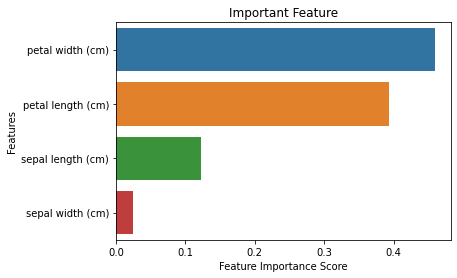

In [36]:
sns.barplot(x = feature_imp, y = feature_imp.index)

plt.title('Important Feature')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()